In [1]:
import os
import pandas as pd
from path import Path
%matplotlib inline
from newsapi import NewsApiClient

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin", language="en", sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]



Total articles about Bitcoin: 3673


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Romain Dillet',
 'title': 'Bitcoin is also having a very, very bad day',
 'description': 'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month — including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes. On CoinGecko, 1 BTC was worth around $7,250 across…',
 'url': 'http://techcrunch.com/2020/03/12/bitcoin-is-also-having-a-very-very-bad-day/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/04/bitcoin-bitfinex.jpg?w=750',
 'publishedAt': '2020-03-12T12:34:45Z',
 'content': 'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars]'}

In [6]:
bitcoin_df = pd.DataFrame.from_dict(bitcoin_headlines['articles'])
bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Romain Dillet,"Bitcoin is also having a very, very bad day",Bitcoin is going through a remarkably bad day....,http://techcrunch.com/2020/03/12/bitcoin-is-al...,https://techcrunch.com/wp-content/uploads/2019...,2020-03-12T12:34:45Z,Bitcoin is going through a remarkably bad day....
1,"{'id': 'mashable', 'name': 'Mashable'}",Stan Schroeder,HTC's Exodus 5G router can be a Bitcoin node,After launching two cryptocurrency-oriented sm...,https://mashable.com/article/htc-exodus-5g-hub/,https://mondrian.mashable.com/2020%252F03%252F...,2020-03-04T13:00:00Z,After launching two cryptocurrency-oriented sm...
2,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Romain Dillet,DeFi aims to bridge the gap between blockchain...,If you’ve been following cryptocurrency news f...,http://techcrunch.com/2020/02/20/defi-aims-to-...,https://techcrunch.com/wp-content/uploads/2020...,2020-02-20T19:18:20Z,If youve been following cryptocurrency news fo...
3,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Manish Singh,India lifts ban on cryptocurrency trading,India’s Supreme Court on Wednesday struck down...,http://techcrunch.com/2020/03/03/india-lifts-b...,https://techcrunch.com/wp-content/uploads/2020...,2020-03-04T06:19:08Z,Indias Supreme Court on Wednesday overturned c...
4,"{'id': 'the-next-web', 'name': 'The Next Web'}",Satoshi Nakaboto,Satoshi Nakaboto: ‘Square gets green light to ...,Our robot colleague Satoshi Nakaboto writes ab...,https://thenextweb.com/hardfork/2020/03/19/sat...,https://img-cdn.tnwcdn.com/image/hardfork?filt...,2020-03-19T10:46:29Z,Our robot colleague Satoshi Nakaboto writes ab...


In [7]:
file_path = Path("../Data/bitcoin_df.csv")
bitcoin_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [8]:
file_path = Path("../Data/bitcoin_df.pickle")
bitcoin_df.to_pickle(file_path)

In [9]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum", language="en", sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]


Total articles about Ethereum: 815


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Romain Dillet',
 'title': 'Bitcoin is also having a very, very bad day',
 'description': 'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month — including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes. On CoinGecko, 1 BTC was worth around $7,250 across…',
 'url': 'http://techcrunch.com/2020/03/12/bitcoin-is-also-having-a-very-very-bad-day/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/04/bitcoin-bitfinex.jpg?w=750',
 'publishedAt': '2020-03-12T12:34:45Z',
 'content': 'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars]'}

In [10]:
ethereum_df = pd.DataFrame.from_dict(ethereum_headlines['articles'])
ethereum_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Romain Dillet,"Bitcoin is also having a very, very bad day",Bitcoin is going through a remarkably bad day....,http://techcrunch.com/2020/03/12/bitcoin-is-al...,https://techcrunch.com/wp-content/uploads/2019...,2020-03-12T12:34:45Z,Bitcoin is going through a remarkably bad day....
1,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Greg Kumparak,Horizon raises another $5M to put virtual item...,If a player picks up an item in an online vide...,http://techcrunch.com/2020/03/06/horizon-raise...,https://techcrunch.com/wp-content/uploads/2020...,2020-03-06T17:01:15Z,If a player picks up an item in an online vide...
2,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Romain Dillet,DeFi aims to bridge the gap between blockchain...,If you’ve been following cryptocurrency news f...,http://techcrunch.com/2020/02/20/defi-aims-to-...,https://techcrunch.com/wp-content/uploads/2020...,2020-02-20T19:18:20Z,If youve been following cryptocurrency news fo...
3,"{'id': 'mashable', 'name': 'Mashable'}",Stan Schroeder,Coinbase Card now works with Google Pay,"Coinbase Card, the Visa debit card that lets y...",https://mashable.com/article/coinbase-card-goo...,https://mondrian.mashable.com/2020%252F03%252F...,2020-03-17T07:30:00Z,"Coinbase Card, the Visa debit card that lets y..."
4,"{'id': 'mashable', 'name': 'Mashable'}",Jack Morse,Not above the law: Steven Seagal's shady crypt...,When it comes to celebrities shilling shady in...,https://mashable.com/article/steven-seagal-sec...,https://mondrian.mashable.com/2020%252F02%252F...,2020-02-27T19:33:58Z,When it comes to celebrities shilling shady in...


In [11]:
file_path = Path("../Data/ethereum_df.csv")
ethereum_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [12]:
file_path = Path("../Data/ethereum_df.pickle")
ethereum_df.to_pickle(file_path)

In [13]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        bitcoin_sentiments.append({
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Text": text,
 
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_sentiments_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
bitcoin_sentiments_df = bitcoin_sentiments_df[cols]

bitcoin_sentiments_df.head()



,Compound,Negative,Neutral,Positive,Text
0,-0.2944,0.078,0.847,0.074,Bitcoin is going through a remarkably bad day....
1,0.0000,0.000,1.000,0.000,After launching two cryptocurrency-oriented sm...
2,0.0000,0.000,1.000,0.000,If youve been following cryptocurrency news fo...
3,-0.5106,0.168,0.730,0.103,Indias Supreme Court on Wednesday overturned c...
4,0.5070,0.000,0.932,0.068,Our robot colleague Satoshi Nakaboto writes ab...


In [14]:
file_path = Path("../Data/bitcoin_sentiments_df.csv")
bitcoin_sentiments_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [15]:
file_path = Path("../Data/bitcoin_sentiments_df.pickle")
bitcoin_sentiments_df.to_pickle(file_path)

In [16]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        ethereum_sentiments.append({
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Text": text,
 
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_sentiments_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
ethereum_sentiments_df = ethereum_sentiments_df[cols]

ethereum_sentiments_df.head()



,Compound,Negative,Neutral,Positive,Text
0,-0.2944,0.078,0.847,0.074,Bitcoin is going through a remarkably bad day....
1,0.0000,0.000,1.000,0.000,If a player picks up an item in an online vide...
2,0.0000,0.000,1.000,0.000,If youve been following cryptocurrency news fo...
3,-0.1027,0.035,0.965,0.000,"Coinbase Card, the Visa debit card that lets y..."
4,0.3182,0.066,0.822,0.112,When it comes to celebrities shilling shady in...


In [17]:
file_path = Path("../Data/ethereum_sentiments_df.csv")
ethereum_sentiments_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [18]:
file_path = Path("../Data/ethereum_sentiments_df.pickle")
ethereum_sentiments_df.to_pickle(file_path)

In [19]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.353384,0.020632,0.905053,0.074316
std,0.351346,0.043071,0.059955,0.036477
min,-0.510600,0.000000,0.730000,0.000000
25%,0.207750,0.000000,0.871500,0.066500
50%,0.507000,0.000000,0.932000,0.068000
75%,0.507000,0.021000,0.932000,0.079500
max,0.789300,0.168000,1.000000,0.137000


In [20]:
# Describe the Ethereum Sentiment
ethereum_sentiments_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.154016,0.037947,0.896368,0.065684
std,0.468309,0.045978,0.064867,0.062167
min,-0.717400,0.000000,0.762000,0.000000
25%,-0.051350,0.000000,0.857000,0.000000
50%,0.340000,0.029000,0.913000,0.065000
75%,0.459300,0.062000,0.933500,0.087500
max,0.895500,0.133000,1.000000,0.208000


### Questions:

Q: Which coin had the highest mean positive score?

**A: Bitcoin has the higher mean positive score compared to ethereum, 0.074 vs. 0.065.**

Q: Which coin had the highest compound score?

**A: Based on the descriptive statistics, Ethereum has the highest compound score that topped at 0.90 vs. the maximum compound score of 0.79 from Ethereum. 

**On the other hand, Bitcoin has compound scores higher than Ethereum on its average, minimum, 25th, 50th and 75th percentiles.**

Q. Which coin had the highest positive score?

**A: Ethereum has the highest positive score with its maximum at 0.21 rather than the 0.14 received by Bitcoin.**

_*Sentiments towards Ethereum are more volatile as the standard deviations are higher than those for Bitcoin on scores for compound, negative, neutral and positive texts.*_

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [21]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [22]:
# Code to download wordnet corpora
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /Users/ava/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
sw = set(stopwords.words('english'))

In [24]:
print(sw)

{'those', 'these', 'do', 'too', 'him', 'that', 'from', 'just', 'hasn', 'doesn', "she's", "mustn't", 'was', 'after', 'over', 'because', 'his', 'its', 'and', "weren't", 'into', 'below', 'having', "hadn't", 'were', 'himself', 'didn', 'wouldn', 'not', 'as', 'he', 'weren', 'the', 'i', 'am', 're', 'yours', 'hadn', 'theirs', 'my', 'if', 'shan', "shan't", 'what', 'their', 'all', 'above', 'only', 'it', 'couldn', 'between', 'does', 'few', 'up', 'how', 'myself', 'her', 'isn', "didn't", 'hers', 'yourself', 'through', "you'll", 'o', 'such', 'did', 'been', 'other', 'itself', 'd', 'ain', 'which', 'mightn', 'themselves', 'herself', 'further', 'should', "shouldn't", 'had', 'in', 'whom', 'an', 'shouldn', "haven't", 'you', "you're", 'ourselves', 'until', 'mustn', "doesn't", 'out', 'why', 'your', 'at', 'there', 'against', 'before', 'aren', "aren't", "needn't", 'be', 'own', 'any', 'but', 'no', 'a', 'can', "wouldn't", 'while', 'of', 'most', "don't", 't', 'to', 'where', "won't", "that'll", 'down', 'doing', '

In [25]:
# Expand the default stopwords list if necessary
sw_addon = {"''", 'and','...','such', 'thus',"n't", "-", '""','_','upon','for','shall','just','onto'}

In [26]:
stop = set(sw.union(sw_addon))

In [27]:
# Complete the tokenizer function
def tokenizer(Text):
    """Tokenizes text."""
    
    # Create a list of the words
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', Text)
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in stop]
#    tokens = [', '.join(output)] left to ngrams function
    
    return tokens

In [28]:
bitcoin_sentiments_df["Tokens"] = bitcoin_sentiments_df['Text'].apply(tokenizer)
bitcoin_sentiments_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.2944,0.078,0.847,0.074,Bitcoin is going through a remarkably bad day....,"[bitcoin, going, remarkably, bad, day, turn, a..."
1,0.0000,0.000,1.000,0.000,After launching two cryptocurrency-oriented sm...,"[launching, two, cryptocurrencyoriented, smart..."
2,0.0000,0.000,1.000,0.000,If youve been following cryptocurrency news fo...,"[youve, following, cryptocurrency, news, past,..."
3,-0.5106,0.168,0.730,0.103,Indias Supreme Court on Wednesday overturned c...,"[indias, supreme, court, wednesday, overturned..."
4,0.5070,0.000,0.932,0.068,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [29]:
file_path = Path("../Data/bitcoin_sentiments_df.pickle")
bitcoin_sentiments_df.to_pickle(file_path)

In [30]:
file_path = Path("../Data/bitcoin_df.csv")
bitcoin_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [31]:
ethereum_sentiments_df["Tokens"] = ethereum_sentiments_df['Text'].apply(tokenizer)
ethereum_sentiments_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.2944,0.078,0.847,0.074,Bitcoin is going through a remarkably bad day....,"[bitcoin, going, remarkably, bad, day, turn, a..."
1,0.0000,0.000,1.000,0.000,If a player picks up an item in an online vide...,"[player, pick, item, online, video, game, owns..."
2,0.0000,0.000,1.000,0.000,If youve been following cryptocurrency news fo...,"[youve, following, cryptocurrency, news, past,..."
3,-0.1027,0.035,0.965,0.000,"Coinbase Card, the Visa debit card that lets y...","[coinbase, card, visa, debit, card, let, spend..."
4,0.3182,0.066,0.822,0.112,When it comes to celebrities shilling shady in...,"[come, celebrity, shilling, shady, initial, co..."


In [32]:
file_path = Path("../Data/ethereum_sentiments_df.csv")
ethereum_sentiments_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [33]:
file_path = Path("../Data/ethereum_sentiments_df.pickle")
ethereum_sentiments_df.to_pickle(file_path)

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [34]:
from collections import Counter
from nltk import ngrams

from nltk.corpus import reuters, stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
from collections import Counter

In [35]:
# Define a bigram_counter function

In [36]:
def bigram_counter(tokens): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(tokens)
    processed = tokenizer(big_string) 
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['Bigram', 'Count'])

In [37]:
# Generate the Bitcoin N-grams where N=2
tokens_bitcoin = bitcoin_sentiments_df.Tokens.astype('str')

In [38]:
print(f'Top 10 Bitcoin Bigrams')
bigram_counter(tokens_bitcoin)

Top 10 Bitcoin Bigrams


,Bigram,Count
0,"(satoshi, nakaboto)",26
1,"(char, robot)",13
2,"(robot, colleague)",13
3,"(colleague, satoshi)",13
4,"(nakaboto, writes)",13
5,"(writes, bitcoin)",13
6,"(every, fucking)",13
7,"(fucking, daywelcome)",13
8,"(daywelcome, another)",13
9,"(another, edition)",13


In [39]:
# Generate the Ethereum N-grams where N=2
tokens_ethereum = ethereum_sentiments_df.Tokens.astype('str')

In [40]:
print(f'Top 10 Ethereum Bigrams')
bigram_counter(tokens_ethereum)

Top 10 Ethereum Bigrams


,Bigram,Count
0,"(fell, first)",3
1,"(first, time)",3
2,"(debit, card)",2
3,"(char, reutersbitcoin)",2
4,"(reutersbitcoin, tanked)",2
5,"(tanked, thursday)",2
6,"(thursday, fell)",2
7,"(time, since)",2
8,"(since, may)",2
9,"(may, amid)",2


In [41]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    
    # Combine all articles in corpus into one large string
    big_string = ' '.join(tokens)
    processed = tokenizer(big_string)
    top_N = dict(Counter(processed).most_common(N))
    return pd.DataFrame(list(top_N.items()), columns=['Word', 'Count'])

In [42]:
# Get the top 10 words for Bitcoin

In [43]:
print(f'Top 10 Bitcoin Words')
token_count(tokens_bitcoin, N=10)

Top 10 Bitcoin Words


,Word,Count
0,bitcoin,41
1,satoshi,26
2,nakaboto,26
3,char,19
4,going,14
5,hour,14
6,btc,14
7,past,14
8,today,14
9,robot,13


In [44]:
# Get the top 10 words for Ethereum
print(f'Top 10 Ethereum Words')
token_count(tokens_ethereum, N=10)

Top 10 Ethereum Words


,Word,Count
0,char,19
1,cryptocurrency,9
2,new,6
3,bitcoin,5
4,company,5
5,first,5
6,fell,5
7,coinbase,4
8,thursday,4
9,selloff,4


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [46]:
# Generate the Bitcoin word cloud
def word_cloud(tokens):
    plt.figure()
    plt.title('Bitcoin Word Cloud', fontsize=50)
    big_string = ' '.join(tokens)
    input_text = big_string
    wc = WordCloud(width=1200, height=800).generate(input_text)
    return plt.imshow(wc)

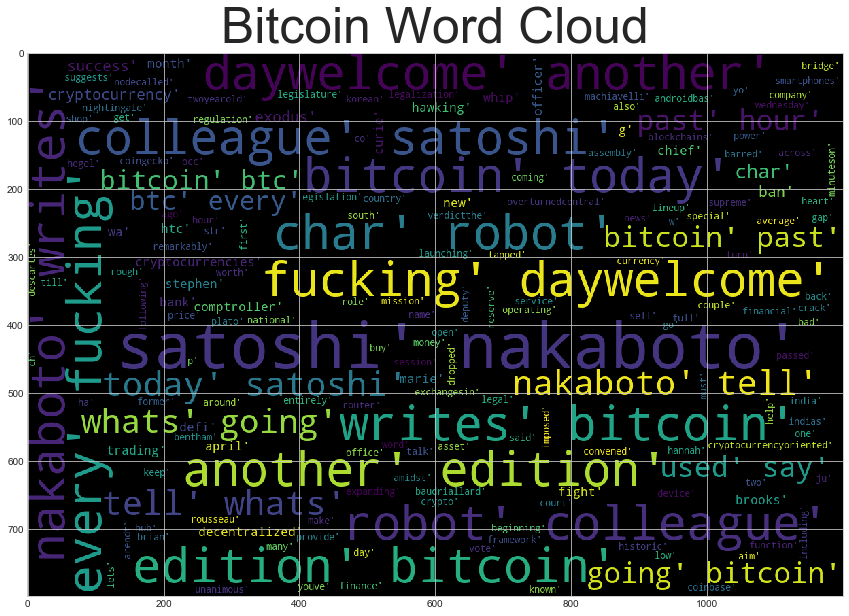

In [47]:
word_cloud(tokens_bitcoin)

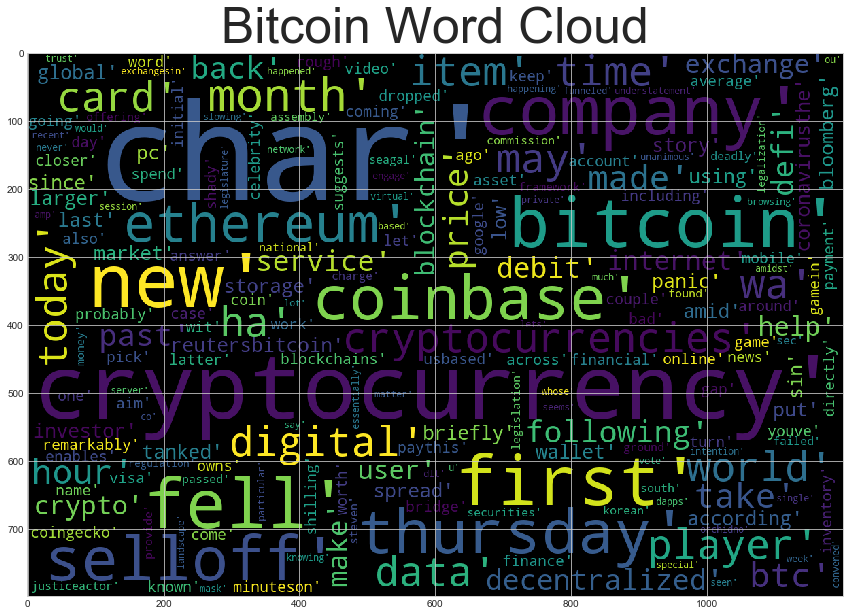

In [48]:
# Generate the Ethereum word cloud
word_cloud(tokens_ethereum)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [49]:
import spacy
from spacy import displacy

In [50]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm
# downloaded onto mlenv environment

In [51]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [52]:
# Concatenate all of the bitcoin text together
text_strings_bitcoin = bitcoin_sentiments_df.Text.astype('str')
text_bitcoin = ' '.join(text_strings_bitcoin)
text_bitcoin[:500]

'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars] After launching two cryptocurrency-oriented smartphones, the HTC Exodus 1 and the Exodus 1s, the company is expanding the lineup with an entirely new device: a 5G router that can function as a full Bitcoin node.\xa0\r\nCalled the '

In [53]:
# Run the NER processor on all of the text
doc_bitcoin = nlp(text_bitcoin)

# Add a title to the document
doc_bitcoin.user_data['title'] = 'Bitcoin NER'

In [86]:
# Render the visualization
#colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
#options = {"ents": ["ORG"], "colors": colors}
bitcoin_entities = displacy.render(doc_bitcoin, style='ent', jupyter=True)

In [56]:
# List all Entities
for ent in doc_bitcoin.ents:
    print(ent.text, ent.label_)

Bitcoin GPE
A couple of hours ago TIME
BTC ORG
15% PERCENT
just 20 minutes TIME
CoinGecko PRODUCT
1 CARDINAL
BTC ORG
around $7,250 MONEY
two CARDINAL
HTC Exodus 1 PRODUCT
Exodus WORK_OF_ART
5 CARDINAL
Bitcoin GPE
HTC Exodus 5 PRODUCT
Android-bas GPE
the past few months DATE
one CARDINAL
DeFi PERSON
DeFi PERSON
Indias Supreme Court ORG
Wednesday DATE
two-year-old DATE
The Reserve Bank of India ORG
April 2018 DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Descartes PERSON
Brian Brooks PERSON
first ORDINAL
the Office of the Comptroller of the Currency ORG
April 1, 2020 DATE
Brooks ORG
OCC ORG
The South Korean National Assembly ORG
today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Plato PERSON
Success ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Hannah Arendt PE

---

## Ethereum NER

In [57]:
# Concatenate all of the bitcoin text together
text_strings_ethereum = ethereum_sentiments_df.Text.astype('str')
text_ethereum = ' '.join(text_strings_ethereum)
text_ethereum[:500]

'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars] If a player picks up an item in an online video game, who owns that item? The player, or the company that made the game?\r\nIn most cases, the answer is probably closer to the latter. The item may be in the players digital inve'

In [58]:
# Run the NER processor on all of the text
doc_ethereum = nlp(text_ethereum)

# Add a title to the document
doc_ethereum.user_data['title'] = 'Ethereum NER'

In [60]:
# Render the visualization
displacy.render(doc_ethereum, style='ent', jupyter=True)

In [61]:
# List all Entities
for ent in doc_ethereum.ents:
    print(ent.text, ent.label_)

Bitcoin GPE
A couple of hours ago TIME
BTC ORG
15% PERCENT
just 20 minutes TIME
CoinGecko PRODUCT
1 CARDINAL
BTC ORG
around $7,250 MONEY
the past few months DATE
one CARDINAL
DeFi PERSON
DeFi PERSON
Visa ORG
Google Pay ORG
Coinbase PRODUCT
first ORDINAL
the Securities and Exchange Commission ORG
Steven Seagal PERSON
Thursday DATE
SEC ORG
2018 DATE
The South Korean National Assembly ORG
today DATE
this past week DATE
2020 CARDINAL
DApps &amp ORG
DLT ORG
Reuters
 ORG
Thursday DATE
6,000 MONEY
first ORDINAL
May DATE
as low as $5,705.31 MONEY
Bloomberg ORG
Reuters
 ORG
Thursday DATE
6,000 MONEY
first ORDINAL
May DATE
as low as $5,705.31 MONEY
Bloomberg ORG
7 CARDINAL
7 CARDINAL
one-day DATE
months DATE
Bitcoin GPE
21 percent PERCENT
the last 24 hours TIME
Earlier today TIME
Bitcoin GPE
6,000 MONEY
first ORDINAL
Some Libra Association ORG
Andreessen Horowitz PERSON
today DATE
50 CARDINAL
The Celo Foundation ORG
‘Alliance For Prosperity’ ORG
Camila Russo PERSON
Building the Next Internet wit